In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 4.0)

In [3]:
import urllib.request

%mkdir data

urllib.request.urlretrieve("http://ufldl.stanford.edu/housenumbers/train_32x32.mat", "data/train_32x32.mat")
urllib.request.urlretrieve("http://ufldl.stanford.edu/housenumbers/test_32x32.mat", "data/test_32x32.mat")

A subdirectory or file data already exists.


('data/test_32x32.mat', <http.client.HTTPMessage at 0x2ccfff4bbe0>)

In [4]:
from scipy.io import loadmat

def load_data(path):
    data = loadmat(path)
    return data['X'], data['y']

X_train, y_train = load_data('data/train_32x32.mat')
X_test, y_test = load_data('data/test_32x32.mat')

print("Training", X_train.shape, y_train.shape)
print("Test", X_test.shape, y_test.shape)

Training (32, 32, 3, 73257) (73257, 1)
Test (32, 32, 3, 26032) (26032, 1)


In [5]:
# Transpose the image arrays
X_train, y_train = X_train.transpose((3,0,1,2)), y_train[:,0]
X_test, y_test = X_test.transpose((3,0,1,2)), y_test[:,0]

print("Training", X_train.shape)
print("Test", X_test.shape)
print('')

num_images = X_train.shape[0] + X_test.shape[0]

print("Total Number of Images", num_images)

Training (73257, 32, 32, 3)
Test (26032, 32, 32, 3)

Total Number of Images 99289


In [6]:
def plot_images(img, labels, nrows, ncols):
    """ Plot nrows x ncols images
    """
    fig, axes = plt.subplots(nrows, ncols)
    for i, ax in enumerate(axes.flat): 
        if img[i].shape == (32, 32, 3):
            ax.imshow(img[i])
        else:
            ax.imshow(img[i,:,:,0])
        ax.set_xticks([]); ax.set_yticks([])
        ax.set_title(labels[i])

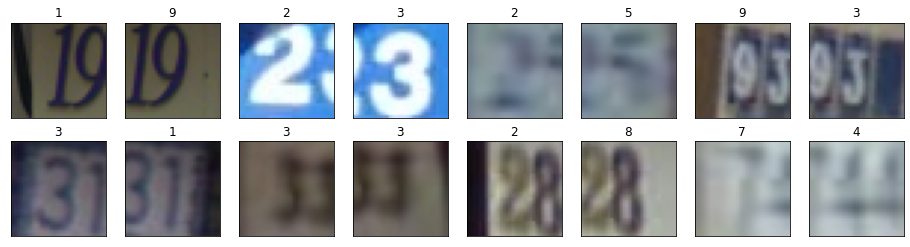

In [19]:
# Plot some training set images
plot_images(X_train, y_train, 2, 8)

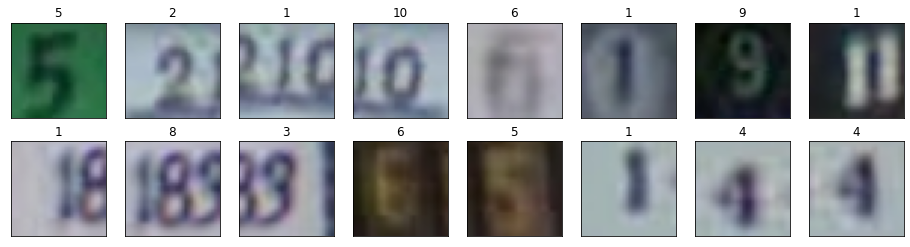

In [8]:
# Plot some test set images
plot_images(X_test, y_test, 2, 8)